In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
%run load_data.py

In [4]:
raw_train.shape

(878049, 9)

In [5]:
raw_train.head(5)

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [6]:
cat = raw_train.groupby('Category').size()
#raw_train.Category.groupby(level=0).count()

In [7]:
cat.sort()

In [8]:
# Total number of crime types
cat.size

39

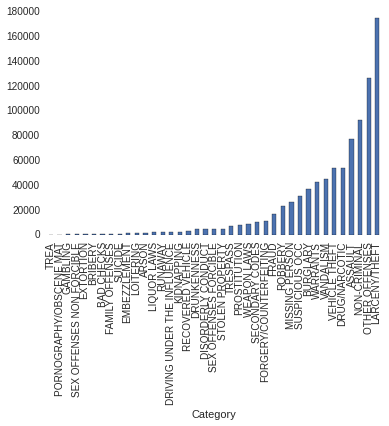

In [9]:
cat.plot(kind='bar')

In [10]:
# take a copy of the raw training set
year_based = raw_train

In [11]:
year_based.dtypes

Dates          object
Category       object
Descript       object
DayOfWeek      object
PdDistrict     object
Resolution     object
Address        object
X             float64
Y             float64
dtype: object

In [12]:
year_based['Dates'] = pd.to_datetime(year_based['Dates'])

In [13]:
year_based.dtypes

Dates         datetime64[ns]
Category              object
Descript              object
DayOfWeek             object
PdDistrict            object
Resolution            object
Address               object
X                    float64
Y                    float64
dtype: object

In [14]:
year_based.head(5)

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [15]:
year_based.Dates[0].year

2015

In [16]:
year_based.shape

(878049, 9)

In [17]:
# Create a column with only Year
year_based['Year'] = year_based['Dates'].map(lambda x: x.year)

In [18]:
year_based.shape

(878049, 10)

In [19]:
year_based.head(5)

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Year
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015


In [20]:
yearly_group = year_based.groupby(['Year', 'Category']).size()

In [21]:
yearly_group

Year  Category                   
2003  ARSON                            154
      ASSAULT                         6555
      BAD CHECKS                        69
      BRIBERY                           12
      BURGLARY                        3017
      DISORDERLY CONDUCT               407
      DRIVING UNDER THE INFLUENCE      135
      DRUG/NARCOTIC                   4875
      DRUNKENNESS                      333
      EMBEZZLEMENT                     130
      EXTORTION                         14
      FAMILY OFFENSES                   60
      FORGERY/COUNTERFEITING          1141
      FRAUD                           1616
      GAMBLING                          14
      KIDNAPPING                       163
      LARCENY/THEFT                  12990
      LIQUOR LAWS                      137
      LOITERING                        100
      MISSING PERSON                  1861
      NON-CRIMINAL                    6566
      OTHER OFFENSES                 10614
      PORNOGRAPHY/OB

In [22]:
# Number of crimes occured in 2003
yearly_group[2003]

Category
ARSON                            154
ASSAULT                         6555
BAD CHECKS                        69
BRIBERY                           12
BURGLARY                        3017
DISORDERLY CONDUCT               407
DRIVING UNDER THE INFLUENCE      135
DRUG/NARCOTIC                   4875
DRUNKENNESS                      333
EMBEZZLEMENT                     130
EXTORTION                         14
FAMILY OFFENSES                   60
FORGERY/COUNTERFEITING          1141
FRAUD                           1616
GAMBLING                          14
KIDNAPPING                       163
LARCENY/THEFT                  12990
LIQUOR LAWS                      137
LOITERING                        100
MISSING PERSON                  1861
NON-CRIMINAL                    6566
OTHER OFFENSES                 10614
PORNOGRAPHY/OBSCENE MAT            1
PROSTITUTION                     923
ROBBERY                         1615
RUNAWAY                          182
SECONDARY CODES              

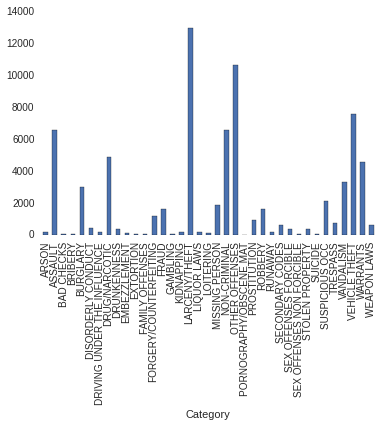

In [23]:
yearly_group[2003].plot(kind='bar')

In [24]:
cat_year_group = year_based.groupby(['Category', 'Year'])
cat_year_group_size = cat_year_group.size()

In [25]:
cat_year_group_size

Category       Year
ARSON          2003     154
               2004     147
               2005     106
               2006     102
               2007     118
               2008     134
               2009     119
               2010     104
               2011      98
               2012     122
               2013     125
               2014     115
               2015      69
ASSAULT        2003    6555
               2004    6467
               2005    5779
               2006    6364
               2007    6105
               2008    6327
               2009    5976
               2010    6128
               2011    6117
               2012    6199
               2013    6280
               2014    6254
               2015    2325
BAD CHECKS     2003      69
               2004      42
               2005      55
               2006      47
                       ... 
VEHICLE THEFT  2012    3116
               2013    3147
               2014    3564
               2015    1408


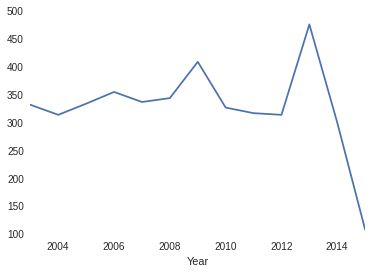

In [26]:
# number of cases of DRUNKENNESS over years
cat_year_group_size['DRUNKENNESS'].plot(kind='line')

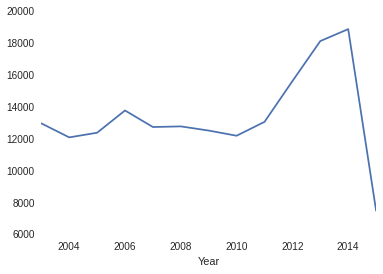

In [27]:
cat_year_group_size['LARCENY/THEFT'].plot(kind='line')

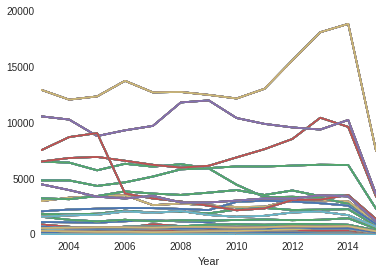

In [28]:
for key, group in cat_year_group:
    cat_year_group_size[key[0]].plot(kind='line')

In [29]:
cat_year_group_size.size

491

In [30]:
cat_year_group_size['ASSAULT'].keys()

Int64Index([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015], dtype='int64')

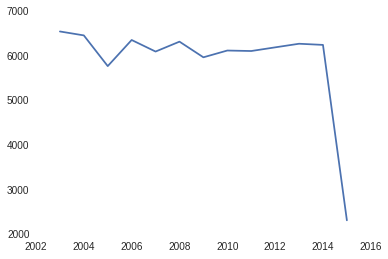

In [31]:
#cat_year_group_size['ASSAULT'][2003]
plt.plot(cat_year_group_size['ASSAULT'].keys(), cat_year_group_size['ASSAULT'])

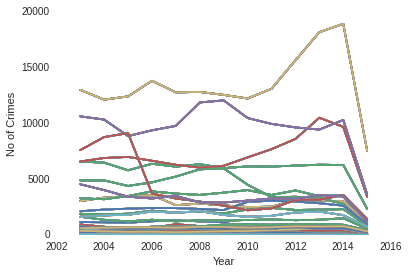

In [32]:
for key, group in cat_year_group:
    plt.plot(cat_year_group_size[key[0]].keys(), cat_year_group_size[key[0]])
plt.xlabel('Year')
plt.ylabel('No of Crimes')

In [33]:
print np.sort(raw_train.Resolution.unique())
print np.sort(raw_train.PdDistrict.unique())
print np.sort(raw_train.Category.unique())

['ARREST, BOOKED' 'ARREST, CITED' 'CLEARED-CONTACT JUVENILE FOR MORE INFO'
 'COMPLAINANT REFUSES TO PROSECUTE'
 'DISTRICT ATTORNEY REFUSES TO PROSECUTE' 'EXCEPTIONAL CLEARANCE'
 'JUVENILE ADMONISHED' 'JUVENILE BOOKED' 'JUVENILE CITED'
 'JUVENILE DIVERTED' 'LOCATED' 'NONE' 'NOT PROSECUTED'
 'PROSECUTED BY OUTSIDE AGENCY' 'PROSECUTED FOR LESSER OFFENSE'
 'PSYCHOPATHIC CASE' 'UNFOUNDED']
['BAYVIEW' 'CENTRAL' 'INGLESIDE' 'MISSION' 'NORTHERN' 'PARK' 'RICHMOND'
 'SOUTHERN' 'TARAVAL' 'TENDERLOIN']
['ARSON' 'ASSAULT' 'BAD CHECKS' 'BRIBERY' 'BURGLARY' 'DISORDERLY CONDUCT'
 'DRIVING UNDER THE INFLUENCE' 'DRUG/NARCOTIC' 'DRUNKENNESS' 'EMBEZZLEMENT'
 'EXTORTION' 'FAMILY OFFENSES' 'FORGERY/COUNTERFEITING' 'FRAUD' 'GAMBLING'
 'KIDNAPPING' 'LARCENY/THEFT' 'LIQUOR LAWS' 'LOITERING' 'MISSING PERSON'
 'NON-CRIMINAL' 'OTHER OFFENSES' 'PORNOGRAPHY/OBSCENE MAT' 'PROSTITUTION'
 'RECOVERED VEHICLE' 'ROBBERY' 'RUNAWAY' 'SECONDARY CODES'
 'SEX OFFENSES FORCIBLE' 'SEX OFFENSES NON FORCIBLE' 'STOLEN PROPERTY'
 '

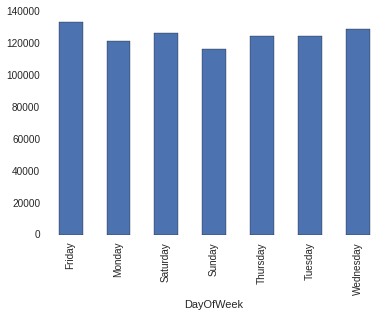

In [34]:
raw_train.groupby(['DayOfWeek']).size().plot(kind='bar')

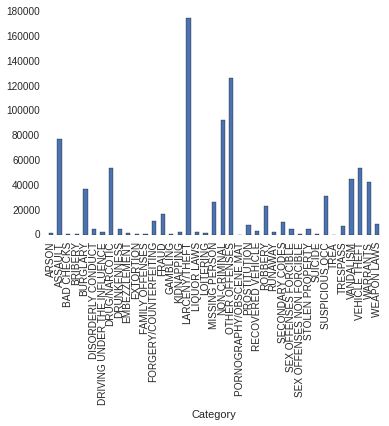

In [35]:
raw_train.groupby(['Category']).size().plot(kind='bar')